# **Music Vizualizer**

## ***DXR FA23***

Coded with help from GPT4 ❤️

### **Features to Capture:**

1. **BPM and Tempo:** These provide the fundamental rhythmic structure of the piece.

2. **Energy Levels:** Areas of high and low energy can convey the emotional tone or pacing.

3. **Frequency Bands (Bass, Mids, Treble):** These can indicate the textural aspects and layering in the music.

4. **Key of the Track:** Understanding the key can provide a basis for harmonic analysis.

5. **Transient Pulses:** This will help in capturing the percussion and rhythmic aspects of the track, and potentially differentiate between types of percussive instruments or beats.

6. **Harmonic Content:** Capturing the harmonic progressions could provide insights into the structural elements of the music.

7. **Timbral Features:** Characteristics like brightness, roughness, or warmth can convey important information about the quality of sound.

8. **Melody Line:** Extracting the main melodic contour can be useful for a more complete understanding.

9. **Dynamic Range:** The variation in loudness over time can also be a meaningful aspect to visualize.

10. **Vocal Presence:** If applicable, identifying vocal regions versus instrumental regions can be intriguing.

---

### **Algorithms**:
1. **Fast Fourier Transform (FFT)**: Useful for frequency domain representation and can help in the separation of bass, mids, and treble.

2. **Spectrogram**: For a time-frequency representation and identifying regions of varying energy.

3. **Wavelet Transform**: Helpful for multi-resolution analysis, capturing both time and frequency-based features.

4. **Mel-Frequency Cepstral Coefficients (MFCC)**: Widely used for timbral and textural features.

5. **Beat Detection Algorithms**: For identifying BPM and tempo.

6. **Harmonic-to-Noise Ratio**: Useful for identifying harmonic content versus noise.

7. **Chroma Features**: Important for key detection and harmonic progression.

8. **Onset Detection**: For transient analysis and possibly separating out percussive events.

9. **Principal Component Analysis (PCA)**: For feature reduction and highlighting the most significant aspects of your data.

10. **Hidden Markov Models (HMM)**: For sequential data like melody lines or rhythmic patterns.

11. **Polyphonic Pitch Detection Algorithms**: If you're interested in capturing chords or multiple notes played at the same time.

12. **Dynamic Time Warping (DTW)**: Useful for comparing temporal sequences for similarities.

13. **Rhythm Histograms**: For capturing rhythmic elements.

14. **Time-Domain Features**: Zero-crossing rate, root mean square level, etc. for simple but effective features.

15. **Tonnetz Features**: Captures harmonic relations.

---

### **Feature-to-Algorithm Matching**
Here's a mapping between the features and algorithms that can be used to extract them:

1. **BPM and Tempo**: Beat Detection Algorithms are specifically designed for this.
  
2. **Energy Levels**: A Spectrogram can help identify regions of high and low energy. Can also use root mean square (RMS) level as a simple metric for energy in the time domain.

3. **Frequency Bands (Bass, Mids, Treble)**: FFT is the foundational algorithm for separating out these frequency components. We can apply filters in the frequency domain to isolate these bands.

4. **Key of the Track**: Chroma Features are excellent for key detection and understanding harmonic progression.

5. **Transient Pulses**: Onset Detection algorithms can capture the transient elements in music, including percussive events. Spectrogram representations can also be helpful for this.

6. **Harmonic Content**: Harmonic-to-Noise Ratio and Chroma Features can be useful for understanding the harmonic aspects of the music.

7. **Timbral Features**: MFCCs are widely used to capture timbral characteristics of audio signals.

8. **Melody Line**: Polyphonic Pitch Detection Algorithms can help identify multiple notes played simultaneously, which can then be used to isolate the melody line.

9. **Dynamic Range**: Time-domain features like RMS can help, but you may also consider more specialized algorithms or metrics for measuring dynamic range.

10. **Vocal Presence**: MFCC and Harmonic-to-Noise Ratio can be tuned to differentiate between vocal and instrumental content, although this may require more advanced methods such as machine learning classifiers trained on vocal and non-vocal samples.

11. **Harmonic Progressions**: Chroma Features and Tonnetz Features are both well-suited to capture harmonic relations in the music.

12. **Rhythmic Patterns**: Rhythm Histograms can capture recurrent rhythmic patterns.


In [31]:
import os
import json
import math
import librosa
import numpy as np
import scipy.signal
import librosa.display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from IPython.display import display
from librosa.beat import beat_track
from librosa.effects import harmonic
from librosa.feature import chroma_stft
from scipy.ndimage import gaussian_filter1d



In [32]:
# List all mp3 files in the 'Audio' folder
audio_dir = 'audio'
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.mp3')]

# Create a dropdown widget for file selection
dropdown = widgets.Dropdown(
    options=audio_files,
    description='Select File:',
    disabled=False
)

# Display the dropdown widget
display(dropdown)



Dropdown(description='Select File:', options=('a-long-way-166385.mp3', 'abstract-future-bass-162604.mp3', 'bab…

In [33]:
selected_file = dropdown.value
audio_file = os.path.join(audio_dir, selected_file)

filename_stripped = selected_file.split('.')[0]
music_data = {}     # Dictionary of dictionaries storing extracted music data

y, sr = librosa.load(audio_file, sr=None, mono=True)
audio_file



'audio\\the-best-jazz-club-in-new-orleans-164472.mp3'

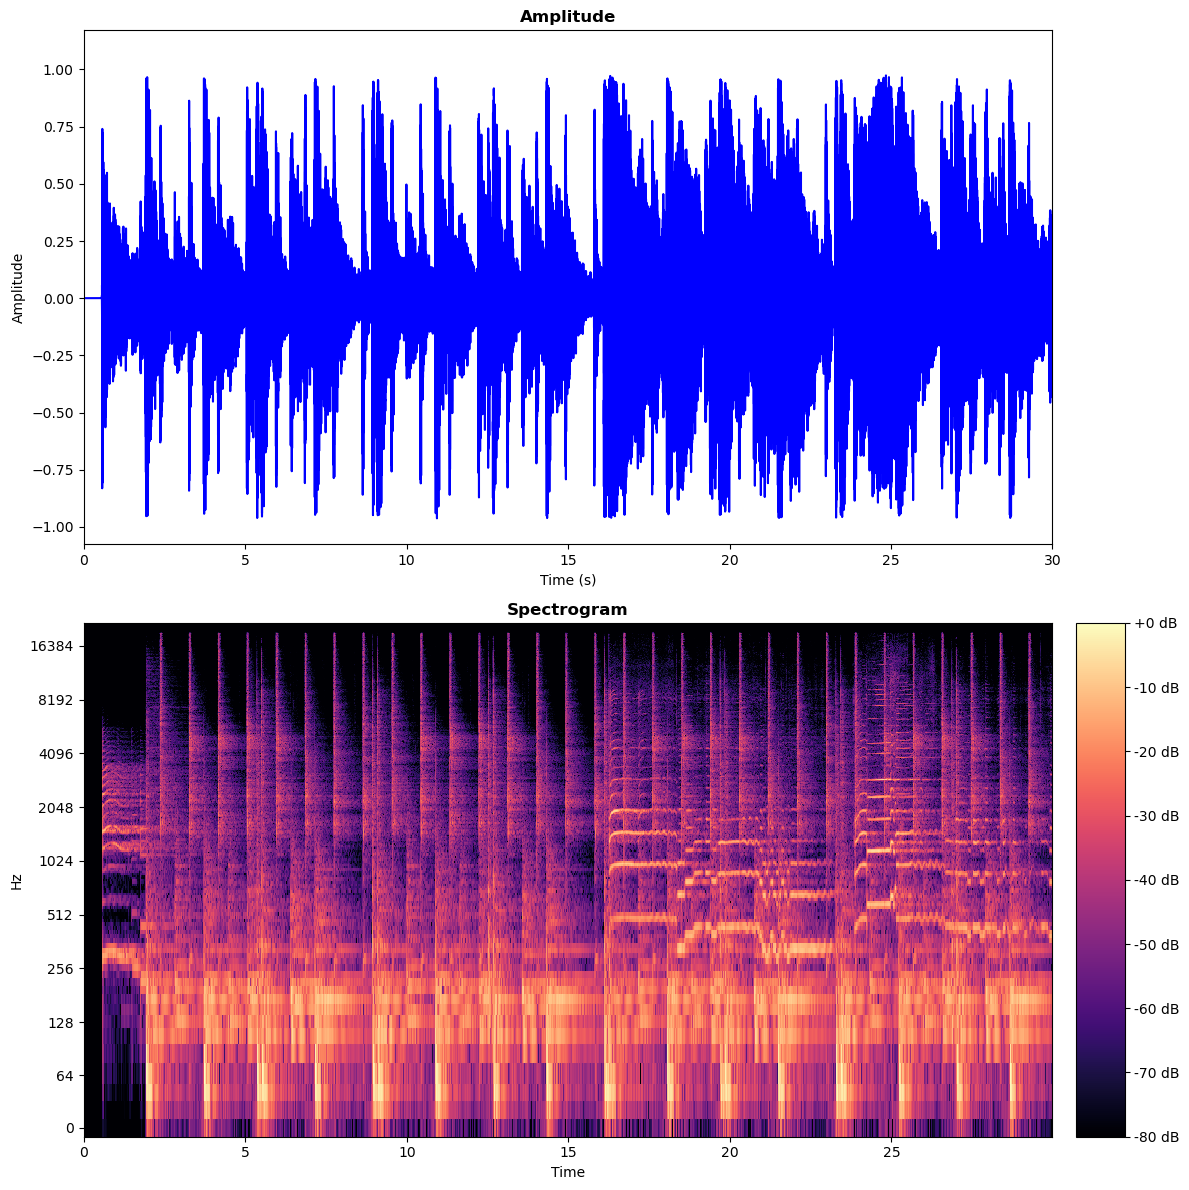

In [34]:
# Apply a windowing function (Hanning window)
frame_length = 2048
hop_length = 512
window = np.hanning(frame_length)

# Perform FFT
D = librosa.stft(y, n_fft=frame_length, hop_length=hop_length, window=window, center=True)

# Extract Features (e.g., Spectrogram)
# Calculate amplitude
amp = np.abs(D)

# Convert amplitude to decibels (for better visualization)
amp_db = librosa.amplitude_to_db(amp, ref=np.max)

# Initialize the plotting canvas
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])  # 2 rows, 2 columns, with a narrow column for the colorbar

# Plot the amplitude of the audio signal
ax0 = plt.subplot(gs[0, 0])
ax0.plot(np.linspace(0, len(y) / sr, len(y)), y, color='b')
ax0.set_xlim([0, 30])  # Limit to first 30 seconds
ax0.set_title('Amplitude', fontweight='bold')
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Amplitude')

# Plot the Spectrogram
ax1 = plt.subplot(gs[1, 0])
img = librosa.display.specshow(amp_db[:, :int(30 * sr / hop_length)], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax1)
ax1.set_title('Spectrogram', fontweight='bold')

# Add colorbar to the Spectrogram
ax2 = plt.subplot(gs[1, 1])
plt.colorbar(img, cax=ax2, format='%+2.0f dB')

# Show both plots
plt.tight_layout()
plt.show()



## **Beat Detection**

Detected tempo: 67 beats per minute


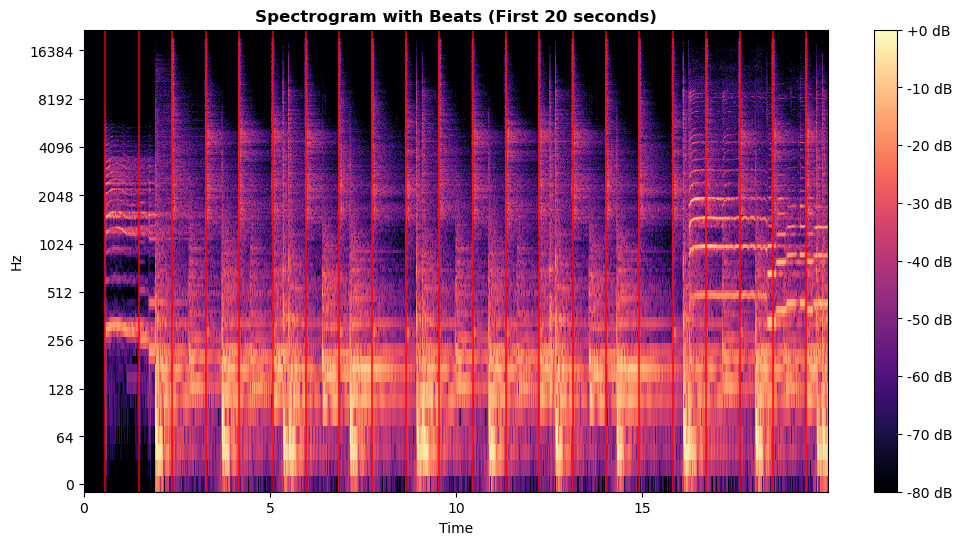

In [35]:
# Beat detection
tempo, beat_frames = beat_track(y=y, sr=sr)

# Round the tempo to the nearest integer
tempo = round(tempo)

# Convert beat frames to time series
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

beat_data = {
    "tempo": tempo,
    "beat_times": beat_times.tolist()  # Convert numpy array to a regular list for JSON compatibility
}

music_data['beat_data'] = beat_data

# Display the detected tempo and beat timings
print(f"Detected tempo: {tempo} beats per minute")
# print(f"Beat times (s): {beat_times}")

# Visualizing beats on top of the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(amp_db[:, :int(20 * sr / hop_length)], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

# Filter beat times to only those occurring within the first 30 seconds
filtered_beat_times = [bt for bt in beat_times if bt <= 20.0]

# Plotting red lines on the filtered beat times
for beat in filtered_beat_times:
    plt.axvline(x=beat, color='r', alpha=0.7)

plt.title('Spectrogram with Beats (First 20 seconds)', fontweight='bold')
plt.show()



## **Energy Levels**

Areas of high and low energy can convey the emotional tone or pacing. A Spectrogram can help identify regions of high and low energy. Can also use root mean square (RMS) level as a simple metric for energy in the time domain.


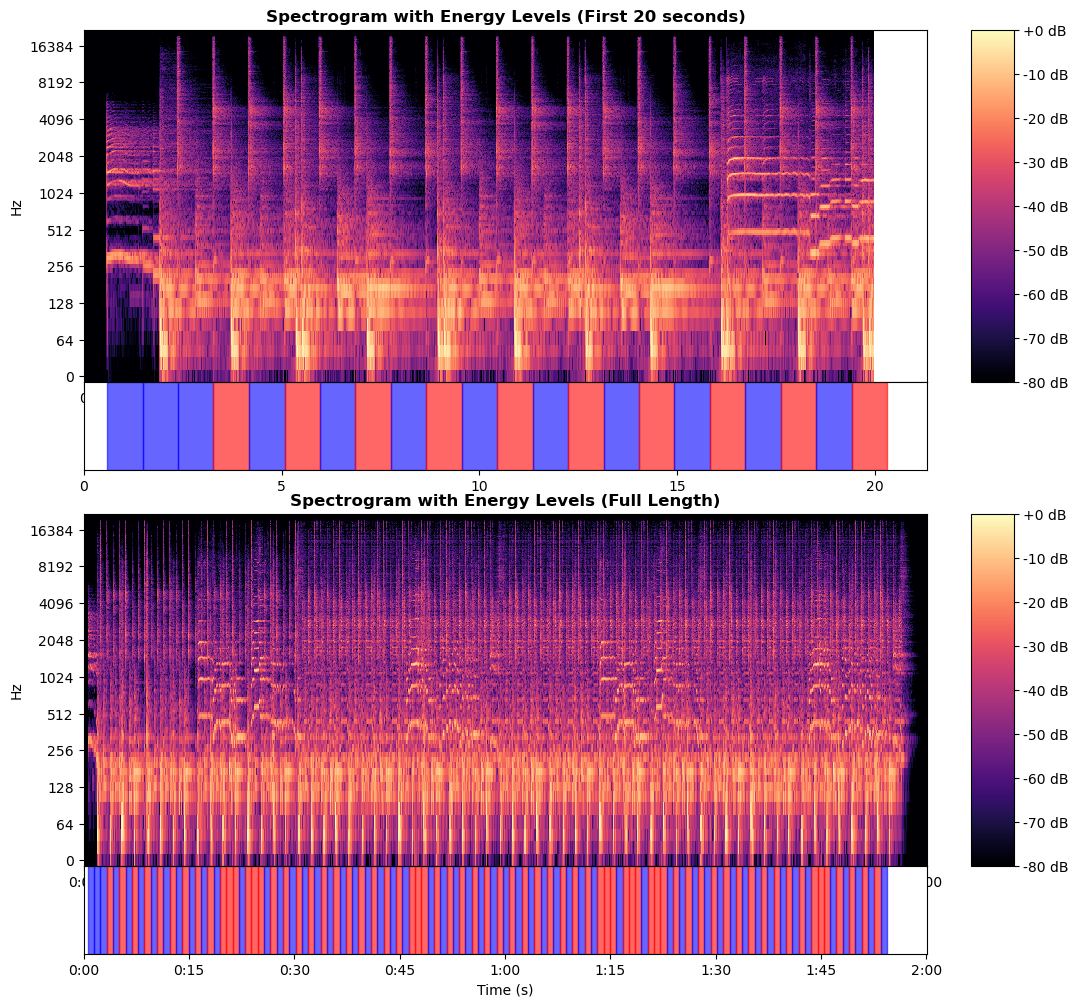

In [36]:
# Initialize an empty list to store the RMS values
rms_values = []

# Calculate RMS for each beat window
for i, beat_frame in enumerate(beat_frames):
    start = librosa.frames_to_samples(beat_frame, hop_length=hop_length)
    next_beat = librosa.frames_to_samples(beat_frames[i + 1], hop_length=hop_length) if i < len(beat_frames) - 1 else len(y)
    rms = np.sqrt(np.mean(np.square(y[start:next_beat])))
    rms_values.append(rms)

# Calculate a threshold to separate high and low energy
rms_threshold = np.mean(rms_values)

# Classify each beat as high or low energy
high_energy_beats = [bt for i, bt in enumerate(beat_times) if rms_values[i] >= rms_threshold]
low_energy_beats = [bt for i, bt in enumerate(beat_times) if rms_values[i] < rms_threshold]

# Serializable
energy_data = {
    "rms_values": [float(val) for val in rms_values],  # Convert elements to Python float
    "rms_threshold": float(rms_threshold),  # Convert to Python float
    "high_energy_beats": [float(val) for val in high_energy_beats],  # Convert elements to Python float
    "low_energy_beats": [float(val) for val in low_energy_beats]  # Convert elements to Python float
}

music_data['energy_data'] = energy_data

# Spectrogram Plot
# Initialize an empty list to store the start time of each beat window
start_times = [librosa.frames_to_time(beat_frame, sr=sr) for beat_frame in beat_frames]

# Initialize the plotting canvas with custom height ratios
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(5, 2, width_ratios=[20, 1], height_ratios=[8, 2, 1, 8, 2])

# --- First 20 seconds ---
# Spectrogram Plot (First 20 seconds)
ax1 = plt.subplot(gs[0, 0])
img1 = librosa.display.specshow(amp_db[:, :int(20 * sr / hop_length)], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax1)
ax1.set_title('Spectrogram with Energy Levels (First 20 seconds)', fontweight='bold')

# Add Colorbar next to Spectrogram
cbar_ax1 = plt.subplot(gs[0, 1])
plt.colorbar(mappable=img1, format='%+2.0f dB', cax=cbar_ax1)

# Energy Level Plot (First 20 seconds)
ax2 = plt.subplot(gs[1, 0], sharex=ax1)

# Draw the energy levels for first 20 seconds
for i in range(len(start_times) - 1):
    if start_times[i] > 20.0:
        break
    if rms_values[i] >= rms_threshold:
        ax2.axvspan(start_times[i], start_times[i + 1], color='r', alpha=0.6)
    else:
        ax2.axvspan(start_times[i], start_times[i + 1], color='b', alpha=0.6)

ax2.set_yticks([])

# Empty subplot for spacing
ax_space = plt.subplot(gs[2, :])
ax_space.axis('off')

# --- Full Length ---
# Spectrogram Plot (Full Length)
ax3 = plt.subplot(gs[3, 0])
img2 = librosa.display.specshow(amp_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax3)
ax3.set_title('Spectrogram with Energy Levels (Full Length)', fontweight='bold')

# Add Colorbar next to Full-Length Spectrogram
cbar_ax2 = plt.subplot(gs[3, 1])
plt.colorbar(mappable=img2, format='%+2.0f dB', cax=cbar_ax2)

# Energy Level Plot (Full Length)
ax4 = plt.subplot(gs[4, 0], sharex=ax3)

# Draw the energy levels for the full song
for i in range(len(start_times) - 1):
    if rms_values[i] >= rms_threshold:
        ax4.axvspan(start_times[i], start_times[i + 1], color='r', alpha=0.6)
    else:
        ax4.axvspan(start_times[i], start_times[i + 1], color='b', alpha=0.6)

ax4.set_xlabel('Time (s)')
ax4.set_yticks([])

# Remove vertical space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0)

plt.show()



## **Smooth Volume**

Will create a smoothed envelope of the gain of the song over time, for global energy control (potentially).

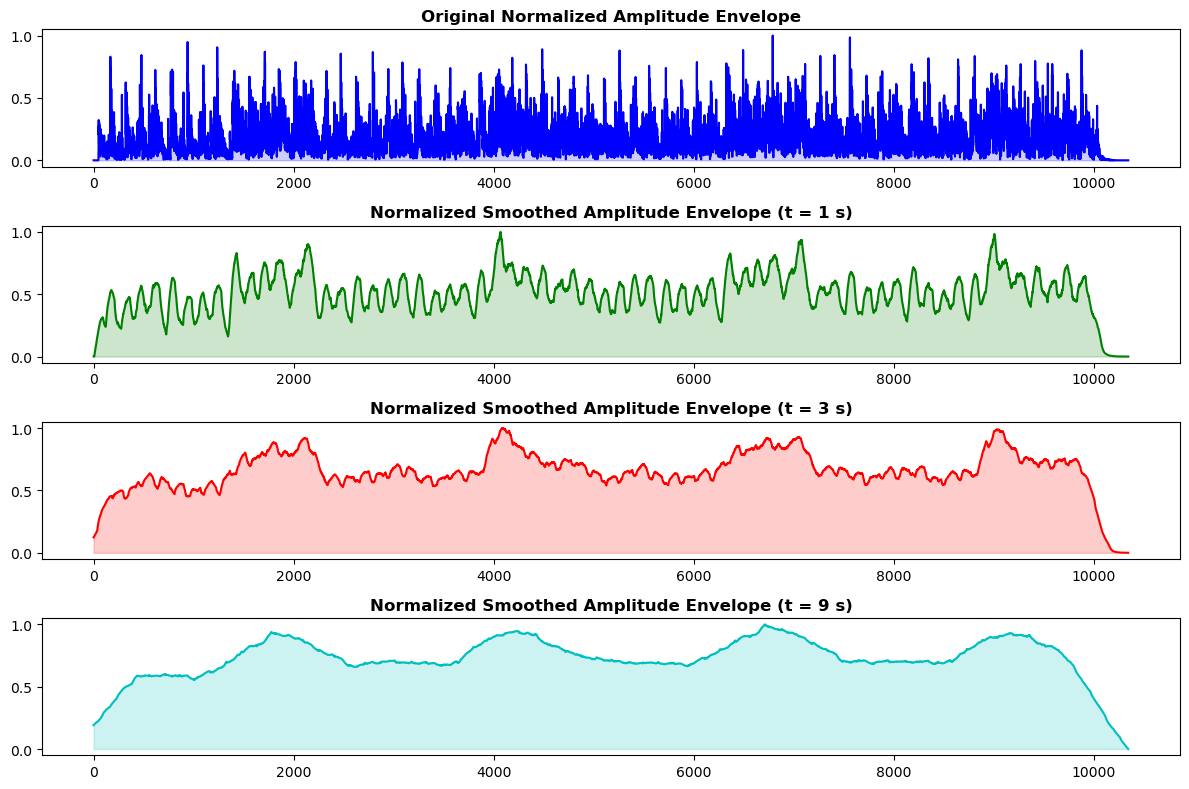

In [37]:
# Convert time to samples
def time_to_frames(t, frame_rate):
    return int(t * frame_rate)

# Define Gaussian Kernel
def gaussian_kernel(kernel_size, std_dev):
    kernel = np.fromfunction(lambda x: np.exp(-0.5 * ((x - (kernel_size - 1) / 2) / std_dev) ** 2), (kernel_size,))
    return kernel / np.sum(kernel)

# Function to normalize data
def normalize_data(data):
    data_min = np.min(data)
    data_max = np.max(data)
    normalized_data = (data - data_min) / (data_max - data_min)
    return normalized_data

hop_length = 512
frame_rate = sr / hop_length  # This gives you the number of frames per second

# Time settings for the Gaussian kernel in seconds
times = [1, 3, 9]  # Three different levels of smoothing in seconds

# Compute amplitude envelope using Hilbert transform
analytic_signal = scipy.signal.hilbert(y)
amplitude_envelope = np.abs(analytic_signal)

# Resample the amplitude envelope to the frame_rate
downsampled_amplitude_envelope = amplitude_envelope[::hop_length]

# Initialize dictionary to hold amplitude envelope data
amplitude_envelope_data = {
    "original": amplitude_envelope.tolist(),  # Original amplitude envelope
    "smoothed": {}
}

# Create a figure
plt.figure(figsize=(12, 8))

# Define colors for each plot
colors = ['b', 'g', 'r', 'c']

# Store the downsampled original envelope after normalization
normalized_downsampled_envelope = normalize_data(downsampled_amplitude_envelope)
amplitude_envelope_data["original"] = normalized_downsampled_envelope.tolist()


# Plot original normalized amplitude envelope
plt.subplot(len(times) + 1, 1, 1)
plt.title('Original Normalized Amplitude Envelope', fontweight='bold')
plt.plot(normalized_downsampled_envelope, color=colors[0])
plt.fill_between(range(len(normalized_downsampled_envelope)), 0, normalized_downsampled_envelope, alpha=0.2, color=colors[0])

# Apply Gaussian kernel smoothing for each time setting
for i, t in enumerate(times):
    frames = time_to_frames(t, frame_rate)  # Convert time to frames
    if frames % 2 == 0:  # Ensure kernel size (in frames) is an odd number
        frames += 1

    # Calculate the standard deviation based on the time in seconds
    # The std_dev should be set so that it corresponds to the smoothing time.
    # This standard deviation implies that approximately 68% of the kernel's weight
    # is within half the duration of the smoothing window.
    std_dev = frames / 2

    kernel = gaussian_kernel(frames, std_dev)
    
    # Apply smoothing to downsampled envelope
    smoothed_envelope = np.convolve(normalized_downsampled_envelope, kernel, 'same')

    # Normalize smoothed envelope
    normalized_smoothed_envelope = normalize_data(smoothed_envelope)

    # Store the normalized smoothed downsampled envelope
    amplitude_envelope_data["smoothed"][f"t_{t}_s"] = normalized_smoothed_envelope.tolist()

    # Plot normalized smoothed amplitude envelope
    plt.subplot(len(times) + 1, 1, i + 2)
    plt.title(f'Normalized Smoothed Amplitude Envelope (t = {t} s)', fontweight='bold')
    plt.plot(normalized_smoothed_envelope, color=colors[i+1])
    plt.fill_between(range(len(normalized_smoothed_envelope)), 0, normalized_smoothed_envelope, alpha=0.2, color=colors[i+1])

music_data['smoothed_volume'] = amplitude_envelope_data['smoothed']['t_9_s']

plt.tight_layout()
plt.show()



## **Frequency Bands (Bass, Mids, Treble)**

FFT is the foundational algorithm for separating out these frequency components. We can apply filters in the frequency domain to isolate these bands.


In [38]:
# Apply power scaling function to attenuate low-amplitude values
def power_scale(values, strength):
    return [val ** strength for val in values]



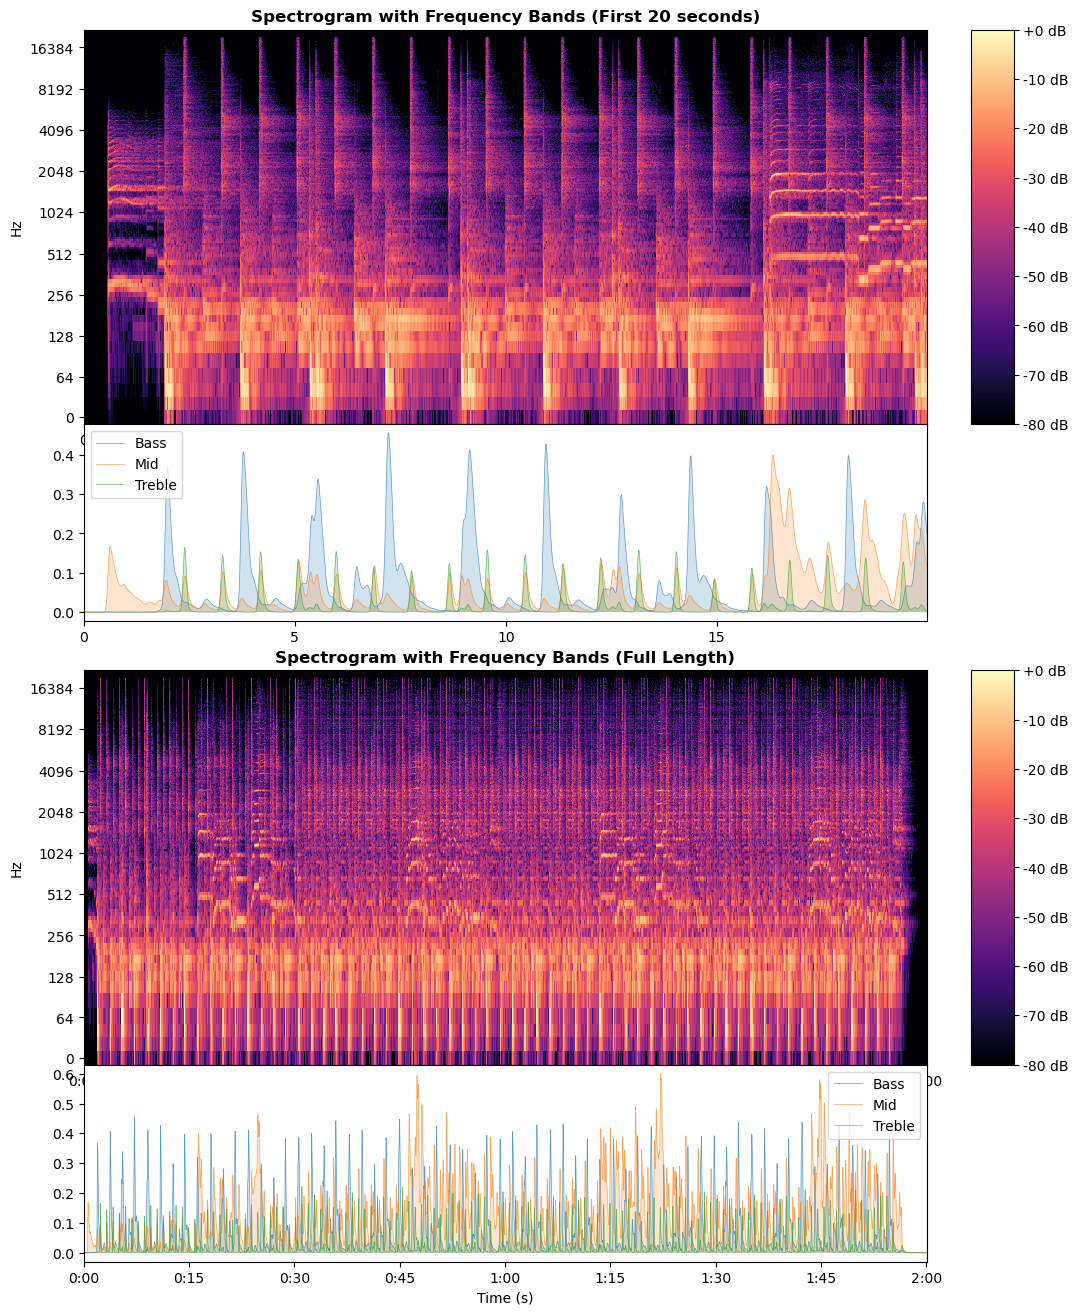

In [39]:
# Configuration for Gaussian smoothing
sigma = 4           # Standard deviation for Gaussian kernel
strength = 2       # Strength of power scaling (should be > 1 for attenuation)

# Frequency bands in Hz
bass_band = (20, 250)
mid_band = (250, 4000)
treble_band = (4000, 20000)

# Frequency bins
freq_bins = np.linspace(0, sr/2, int(frame_length/2 + 1))

# Get the indices of the frequency bins that fall into each band
bass_idx = np.where((freq_bins >= bass_band[0]) & (freq_bins <= bass_band[1]))[0]
mid_idx = np.where((freq_bins >= mid_band[0]) & (freq_bins <= mid_band[1]))[0]
treble_idx = np.where((freq_bins >= treble_band[0]) & (freq_bins <= treble_band[1]))[0]

# Initialize lists to store mean amplitude values for each band
bass_values = []
mid_values = []
treble_values = []

# Calculate mean amplitude in each band for each time frame
for t in range(amp.shape[1]):
    bass_values.append(np.mean(amp[bass_idx, t]))
    mid_values.append(np.mean(amp[mid_idx, t]))
    treble_values.append(np.mean(amp[treble_idx, t]))

# Normalize the values based on their maximum amplitudes
bass_values = [val/np.max(bass_values) for val in bass_values]
mid_values = [val/np.max(mid_values) for val in mid_values]
treble_values = [val/np.max(treble_values) for val in treble_values]

# Smooth the calculated values using Gaussian filter
bass_values = gaussian_filter1d(bass_values, sigma=sigma)
mid_values = gaussian_filter1d(mid_values, sigma=sigma)
treble_values = gaussian_filter1d(treble_values, sigma=sigma)

# Apply the power scaling
bass_values = power_scale(bass_values, strength)
mid_values = power_scale(mid_values, strength)
treble_values = power_scale(treble_values, strength)

# Create a dictionary to store frequency data
freq_data = {
    "bass": {
        "freq_range": bass_band,
        "amplitude_values": bass_values.tolist() if isinstance(bass_values, np.ndarray) else bass_values
    },
    "mid": {
        "freq_range": mid_band,
        "amplitude_values": mid_values.tolist() if isinstance(mid_values, np.ndarray) else mid_values
    },
    "treble": {
        "freq_range": treble_band,
        "amplitude_values": treble_values.tolist() if isinstance(treble_values, np.ndarray) else treble_values
    }
}

music_data['frequency_data'] = freq_data

# Create time vector for plotting
time_vector = np.linspace(0, len(y) / sr, len(bass_values))

# Initialize the plotting canvas with custom height ratios
fig = plt.figure(figsize=(12, 16))
gs = gridspec.GridSpec(5, 2, width_ratios=[20, 1], height_ratios=[8, 4, 1, 8, 4])

# --- First 20 seconds ---
# Spectrogram Plot (First 20 seconds)
ax1 = plt.subplot(gs[0, 0])
img1 = librosa.display.specshow(amp_db[:, :int(20 * sr / hop_length)], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax1)
ax1.set_title('Spectrogram with Frequency Bands (First 20 seconds)', fontweight='bold')

# Add Colorbar next to Spectrogram
cbar_ax1 = plt.subplot(gs[0, 1])
plt.colorbar(mappable=img1, format='%+2.0f dB', cax=cbar_ax1)

# Frequency Bands Plot (First 20 seconds)
ax2 = plt.subplot(gs[1, 0], sharex=ax1)
ax2.plot(time_vector[:int(20 * sr / hop_length)], bass_values[:int(20 * sr / hop_length)], label='Bass', alpha=0.7, linewidth=0.5)
ax2.fill_between(time_vector[:int(20 * sr / hop_length)], bass_values[:int(20 * sr / hop_length)], alpha=0.2)
ax2.plot(time_vector[:int(20 * sr / hop_length)], mid_values[:int(20 * sr / hop_length)], label='Mid', alpha=0.7, linewidth=0.5)
ax2.fill_between(time_vector[:int(20 * sr / hop_length)], mid_values[:int(20 * sr / hop_length)], alpha=0.2)
ax2.plot(time_vector[:int(20 * sr / hop_length)], treble_values[:int(20 * sr / hop_length)], label='Treble', alpha=0.7, linewidth=0.5)
ax2.fill_between(time_vector[:int(20 * sr / hop_length)], treble_values[:int(20 * sr / hop_length)], alpha=0.2)
ax2.legend()

# Empty subplot for spacing
ax_space = plt.subplot(gs[2, :])
ax_space.axis('off')

# --- Full Length ---
# Spectrogram Plot (Full Length)
ax3 = plt.subplot(gs[3, 0])
img2 = librosa.display.specshow(amp_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax3)
ax3.set_title('Spectrogram with Frequency Bands (Full Length)', fontweight='bold')

# Add Colorbar next to Full-Length Spectrogram
cbar_ax2 = plt.subplot(gs[3, 1])
plt.colorbar(mappable=img2, format='%+2.0f dB', cax=cbar_ax2)

# Frequency Bands Plot (Full Length)
ax4 = plt.subplot(gs[4, 0], sharex=ax3)
ax4.plot(time_vector, bass_values, label='Bass', alpha=0.7, linewidth=0.5)
ax4.fill_between(time_vector, bass_values, alpha=0.2)
ax4.plot(time_vector, mid_values, label='Mid', alpha=0.7, linewidth=0.5)
ax4.fill_between(time_vector, mid_values, alpha=0.2)
ax4.plot(time_vector, treble_values, label='Treble', alpha=0.7, linewidth=0.5)
ax4.fill_between(time_vector, treble_values, alpha=0.2)
ax4.set_xlabel('Time (s)')
ax4.legend()

# Remove vertical space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0)

plt.show()



## **Key of the Track**

Will use chroma features to detect the key of the track.

The estimated key of the track is: A


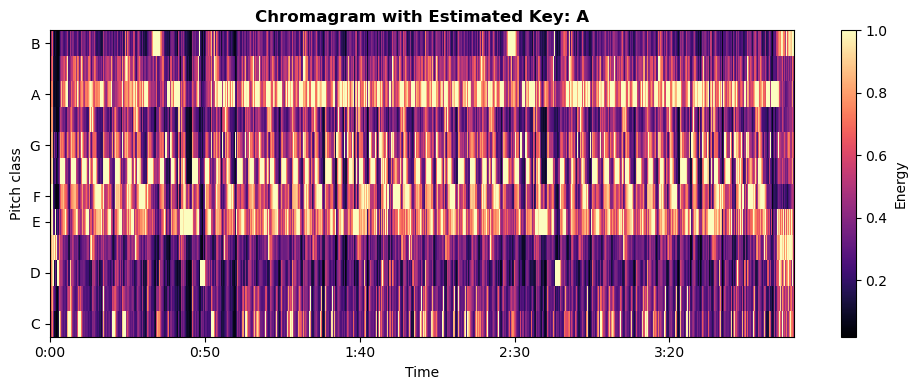

In [40]:
# Compute the chromagram of the audio signal
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# Average the chroma bins across time frames
chroma_avg = np.mean(chroma, axis=1)

# Identify the key by finding the bin with maximum energy
key_idx = np.argmax(chroma_avg)

# List of pitch names corresponding to each bin
pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Extract the key from the list
key = pitch_classes[key_idx]

# Create a dictionary for chroma feature data
chroma_data = {
    "chroma": chroma.tolist(),  # Convert the 2D numpy array to a list of lists for JSON compatibility
    "chroma_avg": chroma_avg.tolist(),  # Convert the numpy array to a regular list
    "key_idx": int(key_idx),  # Convert the numpy int to a regular int
    "key": key  # The estimated key as a string
}

music_data['chroma_data'] = chroma_data

print(f"The estimated key of the track is: {key}")

# Visualizing the chromagram for clarity
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar(label='Energy')
plt.title(f'Chromagram with Estimated Key: {key}', fontweight='bold')
plt.tight_layout()
plt.show()



## **Transient Pulses**

Onset Detection algorithms can capture the transient elements in music, including percussive events. Spectrogram representations can also be helpful for this.

c:\Users\willj\anaconda3\envs\music\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\willj\anaconda3\envs\music\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


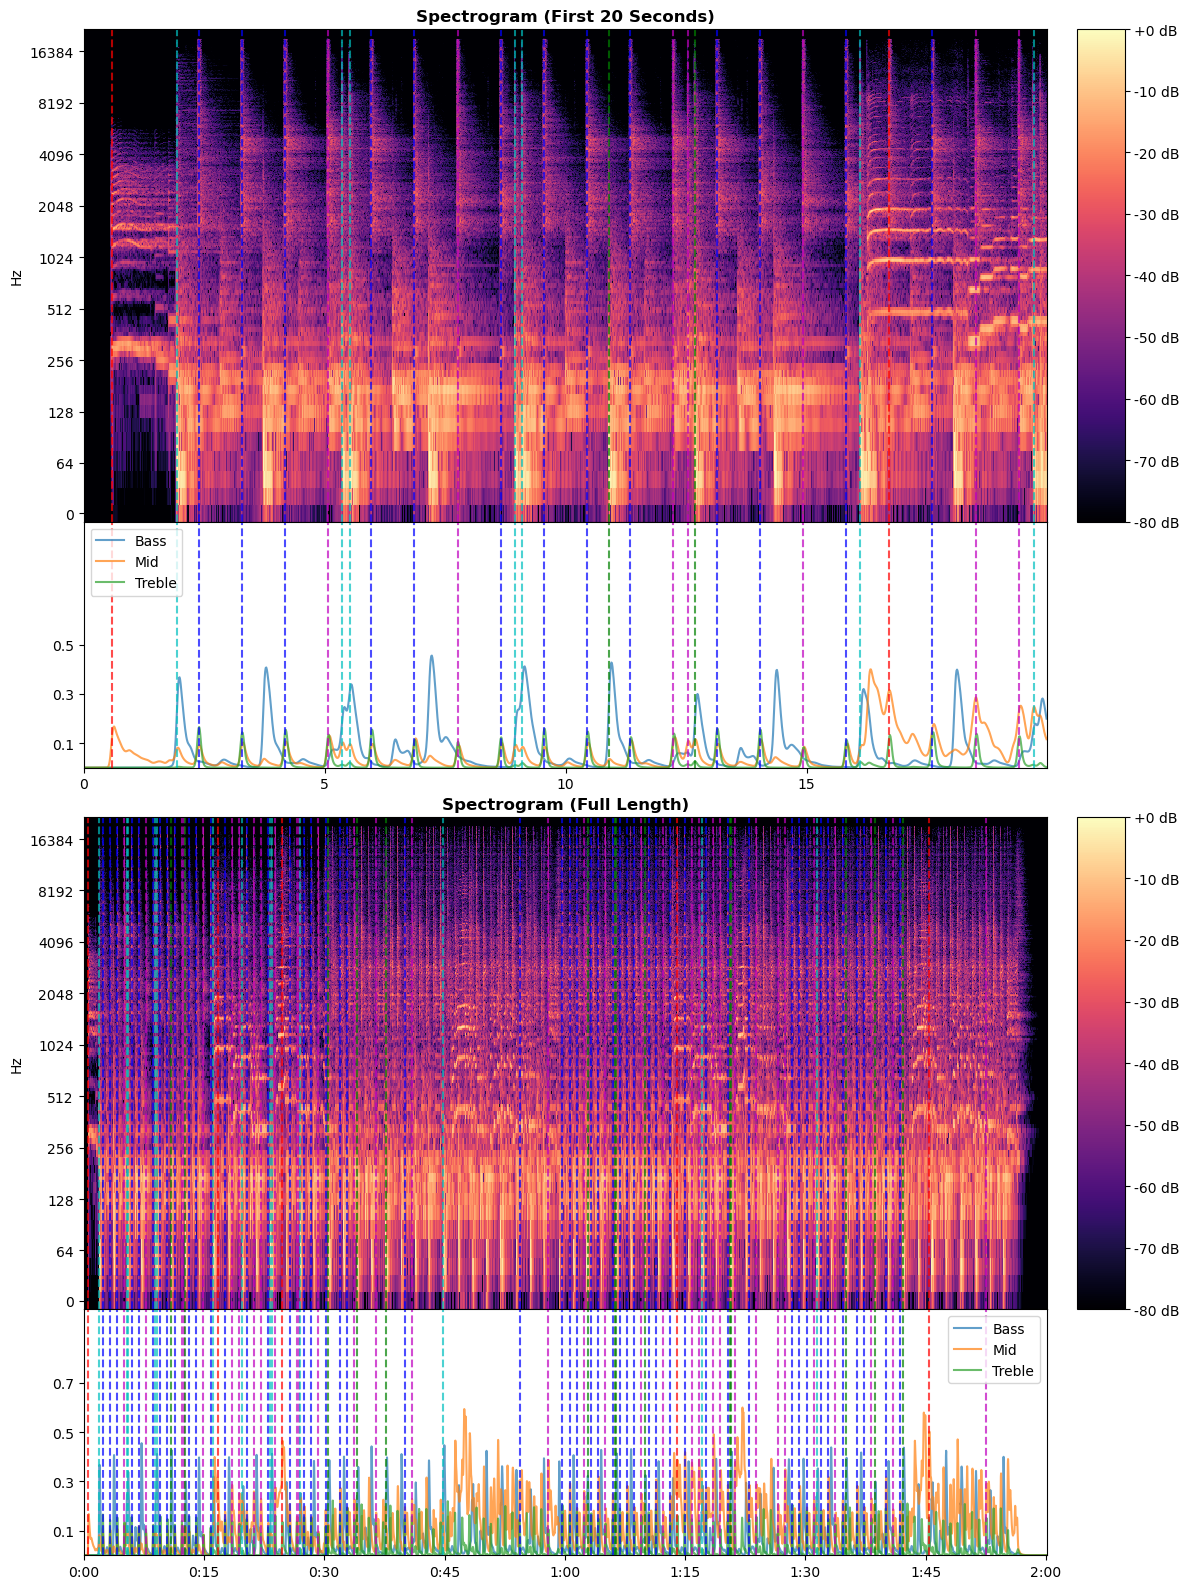

In [41]:
# Determines the number of groups of transients to be detected
n_clusters = 5

# Declare sensitivity threshold for onset detection. 
# Lower value = more sensitive (more onsets), higher value = less sensitive (fewer onsets)
delta_threshold = 0.3

# Step 1: Detect Onsets
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, hop_length=hop_length, delta=delta_threshold)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Initialize empty list to store feature vectors
feature_vectors = []

# Extract Features around Onsets
for onset in onset_frames:
    window = y[onset * hop_length : (onset * hop_length) + 2048]
    spectrum = np.abs(np.fft.fft(window))
    feature_vector = [np.max(spectrum), np.mean(spectrum)]
    feature_vectors.append(feature_vector)

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(feature_vectors)
labels = kmeans.labels_

# Create a dictionary to store transient data
transient_data = {
    "onset_times": onset_times.tolist(), # Convert to list for JSON compatibility
    "labels": labels.tolist() # Convert numpy array to list
}

music_data['transients'] = transient_data

# Initialize the plotting canvas with custom height ratios
fig = plt.figure(figsize=(12, 16))
gs = gridspec.GridSpec(5, 2, width_ratios=[20, 1], height_ratios=[2, 1, 0.2, 2, 1], hspace=0.0)
class_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']

# --- First 20 seconds ---
ax1 = plt.subplot(gs[0, 0])
img1 = librosa.display.specshow(amp_db[:, :int(20 * sr / hop_length)], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax1)
ax1.set_title('Spectrogram (First 20 Seconds)', fontweight='bold')
ax1.xaxis.set_visible(False)

for idx, onset in enumerate(onset_times):
    if onset <= 20.0:
        class_label = labels[idx]
        color = class_colors[class_label]
        ax1.axvline(x=onset, color=color, linestyle='--', alpha=0.7)

cbar_ax1 = plt.subplot(gs[0, 1])
plt.colorbar(mappable=img1, format='%+2.0f dB', cax=cbar_ax1)

ax2 = plt.subplot(gs[1, 0], sharex=ax1)
# Assuming you have bass_values, mid_values, and treble_values
ax2.plot(time_vector[:int(20 * sr / hop_length)], bass_values[:int(20 * sr / hop_length)], label='Bass', alpha=0.7)
ax2.plot(time_vector[:int(20 * sr / hop_length)], mid_values[:int(20 * sr / hop_length)], label='Mid', alpha=0.7)
ax2.plot(time_vector[:int(20 * sr / hop_length)], treble_values[:int(20 * sr / hop_length)], label='Treble', alpha=0.7)
ax2.set_yticks(ax2.get_yticks()[::2])
ax2.set_ylim(0, 1)

for idx, onset in enumerate(onset_times):
    if onset <= 20.0:
        class_label = labels[idx]
        color = class_colors[class_label]
        ax2.axvline(x=onset, color=color, linestyle='--', alpha=0.7)

ax2.legend()

# Empty subplot for spacing
ax_space = plt.subplot(gs[2, :])
ax_space.axis('off')

# --- Full Length ---
ax3 = plt.subplot(gs[3, 0])
img3 = librosa.display.specshow(amp_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax3)
ax3.set_title('Spectrogram (Full Length)', fontweight='bold')
ax3.xaxis.set_visible(False)

for idx, onset in enumerate(onset_times):
    class_label = labels[idx]
    color = class_colors[class_label]
    ax3.axvline(x=onset, color=color, linestyle='--', alpha=0.7)

cbar_ax3 = plt.subplot(gs[3, 1])
plt.colorbar(mappable=img3, format='%+2.0f dB', cax=cbar_ax3)

ax4 = plt.subplot(gs[4, 0], sharex=ax3)
ax4.plot(time_vector, bass_values, label='Bass', alpha=0.7)
ax4.plot(time_vector, mid_values, label='Mid', alpha=0.7)
ax4.plot(time_vector, treble_values, label='Treble', alpha=0.7)
ax4.set_yticks(ax4.get_yticks()[::2])
ax4.set_ylim(0, 1)

for idx, onset in enumerate(onset_times):
    class_label = labels[idx]
    color = class_colors[class_label]
    ax4.axvline(x=onset, color=color, linestyle='--', alpha=0.7)

ax4.legend()

plt.subplots_adjust(wspace=0.1, hspace=0)
plt.tight_layout()
plt.show()



## **Harmonic Content**

Harmonic-to-Noise Ratio and Chroma Features can be useful for understanding the harmonic aspects of the music

C:\Users\willj\AppData\Local\Temp\ipykernel_38596\2501364527.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # This will further minimize the whitespace
c:\Users\willj\anaconda3\envs\music\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


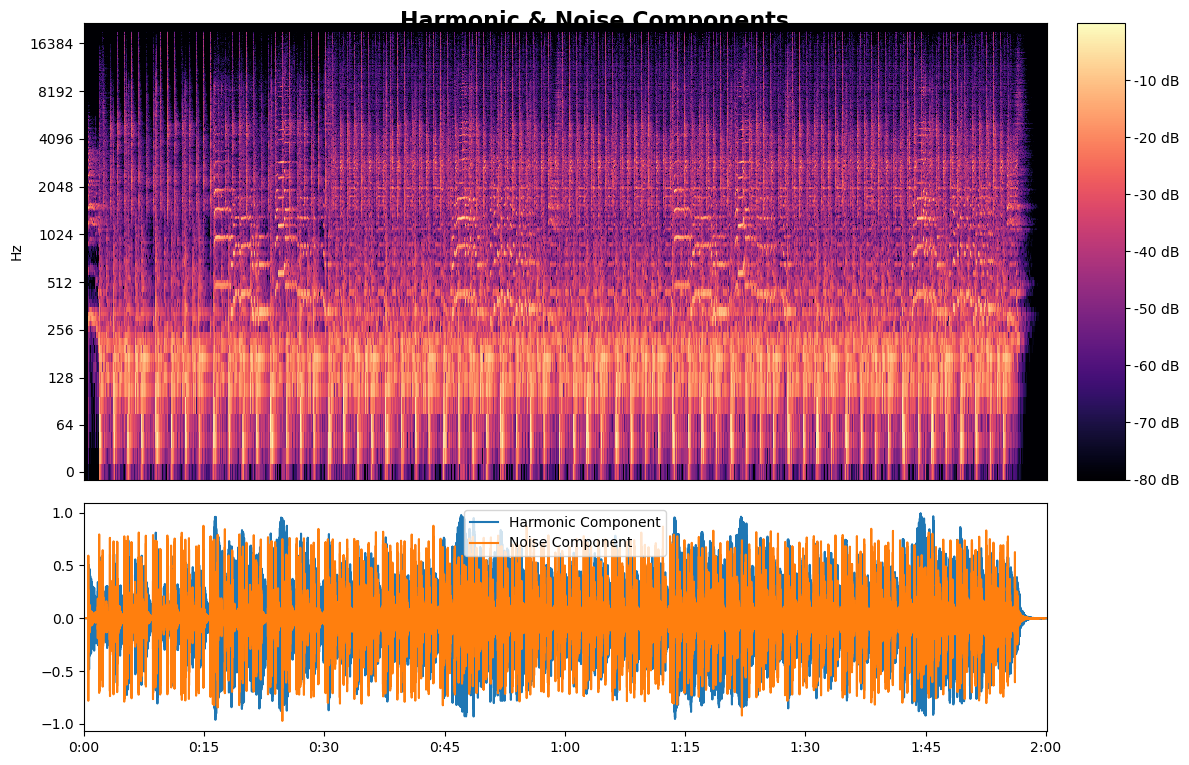

Harmonic-to-Noise Ratio: 4.077282428741455


In [42]:
# Calculate Harmonic-to-Noise Ratio (HNR)
harmonic_component = librosa.effects.harmonic(y)
noise_component = y - harmonic_component
hnr = np.sum(harmonic_component ** 2) / np.sum(noise_component ** 2)

# Initialize the plotting canvas with custom height ratios
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[20, 1], height_ratios=[8, 4])

# Spectrogram
D = librosa.stft(y)  # Compute the STFT
amp_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

ax1 = plt.subplot(gs[0, 0])
img1 = librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='log', ax=ax1)
ax1.xaxis.set_visible(False)  # Turn off x-axis labels for spectrogram

cbar_ax1 = plt.subplot(gs[0, 1])
plt.colorbar(mappable=img1, format='%+2.0f dB', cax=cbar_ax1)

# Harmonic and Noise Components
ax2 = plt.subplot(gs[1, 0], sharex=ax1)
time_values = np.linspace(0, len(harmonic_component) / sr, len(harmonic_component))  # Convert sample indices to time
plt.plot(time_values, harmonic_component, label='Harmonic Component')
plt.plot(time_values, noise_component, label='Noise Component')
plt.legend()

# Remove titles from the subplots and set a single main title
ax1.set_title('')
ax2.set_title('')
fig.suptitle('Harmonic & Noise Components', fontsize=16, y=0.95, fontweight='bold')  
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.tight_layout()  # This will further minimize the whitespace
plt.show()

print(f"Harmonic-to-Noise Ratio: {hnr}")


## **Timbral Features**



## **Melody Line**



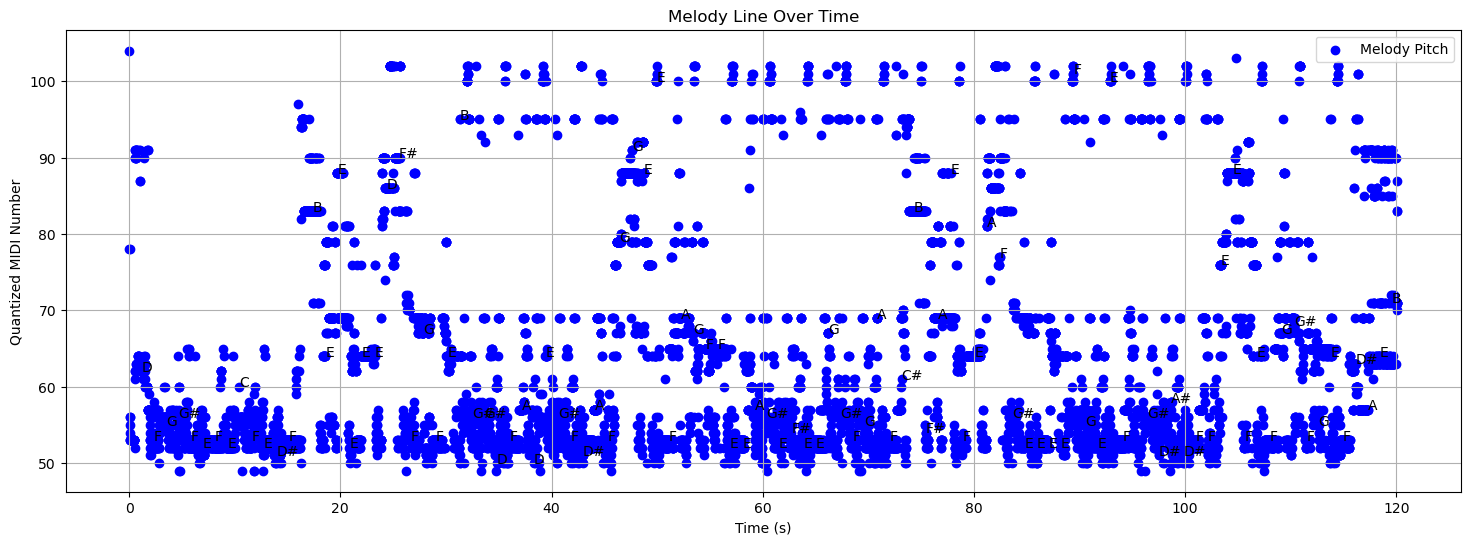

In [43]:
# Step 1: Harmonic Separation
harmonic_audio = librosa.effects.harmonic(y)

# Step 2: Pitch Estimation using Pitch Tracking (piptrack)
pitches, magnitudes = librosa.core.piptrack(y=harmonic_audio, sr=sr)
pitch_max = []

# Extract maximum pitch for each time frame
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()
    pitch_max.append(pitches[index, t])

pitch_max = np.array(pitch_max)

# Step 3: Melody Line Generation (simple heuristic: zero out low magnitude frames)
# You can also use machine learning models or more advanced heuristics for this step.
threshold = np.median(magnitudes)
melody_line = np.where(magnitudes.max(axis=0) > threshold, pitch_max, 0)

# Function to convert frequency to MIDI note
def freq_to_midi(frequency):
    return 69 + 12 * math.log2(frequency / 440.0)

# Function to convert MIDI note to its name
def midi_to_note(midi_number):
    notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    return notes[int(midi_number) % 12]

# Initialize an empty list to hold the quantized MIDI numbers
quantized_midi_numbers = []

# Create time vector based on hop_length and sampling rate
# Assuming a default hop_length of 512 samples in your feature extraction
hop_length = 512  # You may have used a different value
time_vector = np.arange(len(melody_line)) * (hop_length / float(sr))

# Loop through the melody line (frequencies)
for freq in melody_line:
    if freq > 0:  # Ignore zero frequencies (silent frames)
        # Convert frequency to MIDI number and quantize
        midi_num = freq_to_midi(freq)
        quantized_midi = round(midi_num)
    else:
        quantized_midi = None  # None represents a rest or non-melodic frame

    quantized_midi_numbers.append(quantized_midi)

# Convert numpy arrays and other non-serializable data to lists
melody_line_list = melody_line.tolist()
quantized_midi_numbers_list = [x if x is not None else 'None' for x in quantized_midi_numbers]  # Replace Python None with 'None' string for JSON compatibility
time_vector_list = time_vector.tolist()

# Create a dictionary to store the melody line data
melody_data = {
    'melody_line': melody_line_list,
    'quantized_midi_numbers': quantized_midi_numbers_list,
    'time_vector': time_vector_list
}

music_data['melody_data'] = melody_data

# Plotting
plt.figure(figsize=(18, 6))

# Plot MIDI numbers over time
plt.scatter(time_vector, quantized_midi_numbers, c='b', label='Melody Pitch')

# Annotate some points with note names (optional)
for i, (time, midi_num) in enumerate(zip(time_vector, quantized_midi_numbers)):
    if midi_num is not None and i % 100 == 0:  # Annotate every 100th point as an example
        plt.annotate(midi_to_note(midi_num), (time, midi_num))

plt.title('Melody Line Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Quantized MIDI Number')
plt.grid(True)
plt.legend()
plt.show()



## **Dynamic Range**



## **Vocal Presence**



## **Harmonic Progressions**

Chroma Features and Tonnetz Features are both well-suited to capture harmonic relations in the music.

c:\Users\willj\anaconda3\envs\music\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


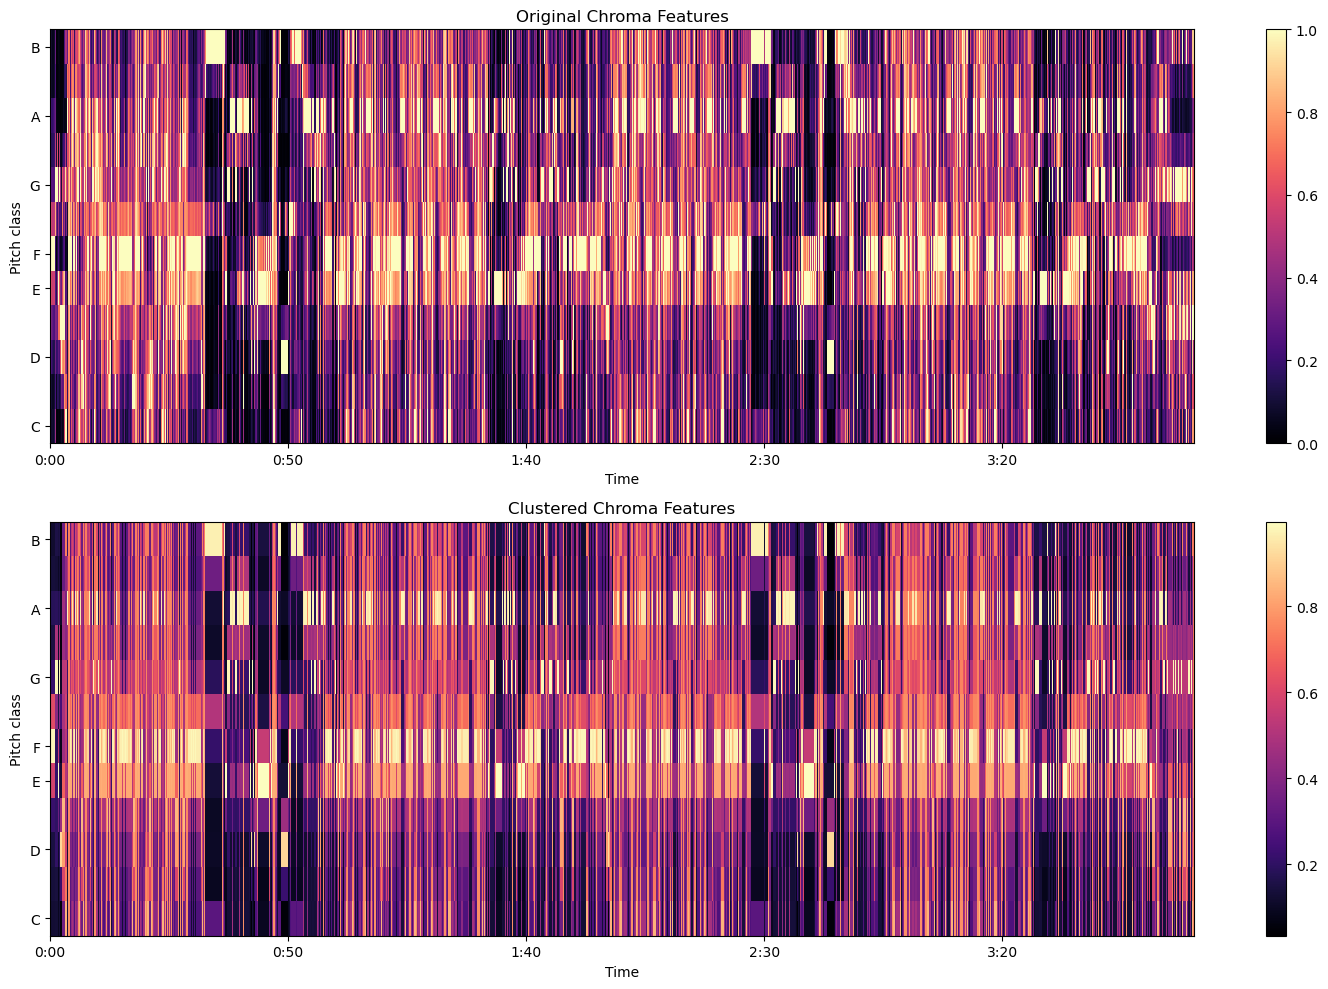

In [44]:
# Extract Chroma features
chroma = chroma_stft(y=y, sr=sr)

# Apply KMeans clustering
num_clusters = 12  # Or another number depending on your specific needs
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(chroma.T)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Now, let's plot the results
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

# Original Chroma Features
img1 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', ax=ax[0])
ax[0].set_title('Original Chroma Features')
fig.colorbar(img1, ax=ax[0])

# Clustered Chroma Features
clustered_chroma = np.array([cluster_centers[label] for label in labels]).T
img2 = librosa.display.specshow(clustered_chroma, x_axis='time', y_axis='chroma', ax=ax[1])
ax[1].set_title('Clustered Chroma Features')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


## **Rhythmic Patterns**

Rhythm Histograms can capture recurrent rhythmic patterns.

## **Saving Music Data**

Here, I'll serialize the music dictionary objects as a JSON object, readable by Unity. 

In [45]:
# Serialize data to JSON
with open(f'feature_data/{filename_stripped}.json', 'w') as f:
    json.dump(music_data, f)



In [54]:
music_data.keys()

dict_keys(['beat_data', 'energy_data', 'smoothed_volumes', 'frequency_data', 'chroma_data', 'transients', 'melody_data'])